Targets:  
*   Add Regularization, Dropout
*   Add GAP


Results:  
*   Parameters: 7.5k
*   Best Train Accuracy: 99.36 (14th Epoch)
*   Best Test Accuracy: 99.33 (9th Epoch)

Analysis: Model is not overfitting, model can be improved further to get 99.4% or more using image augmentation techniques.


In [1]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Model_2, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, evaluate_model

In [2]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [3]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [4]:
batch_size = 128

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 311440213.07it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 37678287.35it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 174590815.83it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16282503.22it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



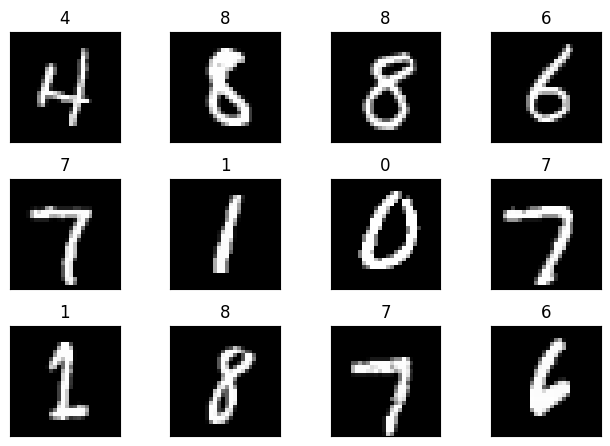

In [5]:
plot_sampledata(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Model_2().to(device)
modelsummary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
           Conv2d-13           [-1, 12, 10, 10]             864
             ReLU-14           [-1, 12,

Epoch 1


Train: Loss=0.0666 Batch_id=468 Accuracy=93.94: 100%|██████████| 469/469 [00:23<00:00, 19.76it/s]


Test set: Average loss: 0.0651, Accuracy: 9794/10000 (97.94%)

Epoch 2


Train: Loss=0.0824 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:18<00:00, 24.74it/s]


Test set: Average loss: 0.0381, Accuracy: 9891/10000 (98.91%)

Epoch 3


Train: Loss=0.0229 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:17<00:00, 27.56it/s]


Test set: Average loss: 0.0331, Accuracy: 9900/10000 (99.00%)

Epoch 4


Train: Loss=0.0479 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:18<00:00, 25.91it/s]


Test set: Average loss: 0.0315, Accuracy: 9900/10000 (99.00%)

Epoch 5


Train: Loss=0.0040 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:17<00:00, 26.74it/s]


Test set: Average loss: 0.0270, Accuracy: 9912/10000 (99.12%)

Epoch 6


Train: Loss=0.0137 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:18<00:00, 26.05it/s]


Test set: Average loss: 0.0238, Accuracy: 9925/10000 (99.25%)

Epoch 7


Train: Loss=0.0263 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:17<00:00, 26.42it/s]


Test set: Average loss: 0.0250, Accuracy: 9927/10000 (99.27%)

Epoch 8


Train: Loss=0.0409 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:18<00:00, 26.04it/s]


Test set: Average loss: 0.0249, Accuracy: 9925/10000 (99.25%)

Epoch 9


Train: Loss=0.0346 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:17<00:00, 27.14it/s]


Test set: Average loss: 0.0231, Accuracy: 9933/10000 (99.33%)

Epoch 10


Train: Loss=0.0221 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:17<00:00, 26.47it/s]


Test set: Average loss: 0.0237, Accuracy: 9927/10000 (99.27%)

Epoch 11


Train: Loss=0.0130 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:18<00:00, 25.88it/s]


Test set: Average loss: 0.0260, Accuracy: 9914/10000 (99.14%)

Epoch 12


Train: Loss=0.0059 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:17<00:00, 26.97it/s]


Test set: Average loss: 0.0261, Accuracy: 9924/10000 (99.24%)

Epoch 13


Train: Loss=0.0014 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:18<00:00, 25.58it/s]


Test set: Average loss: 0.0246, Accuracy: 9926/10000 (99.26%)

Epoch 14


Train: Loss=0.0099 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:17<00:00, 26.96it/s]


Test set: Average loss: 0.0234, Accuracy: 9925/10000 (99.25%)

Epoch 15


Train: Loss=0.0047 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:18<00:00, 25.80it/s]


Test set: Average loss: 0.0272, Accuracy: 9923/10000 (99.23%)

Set\t Max Acc@Epoch	 Last Epoch Acc
train	 99.36@14		99.34
test	 99.33@9		99.23


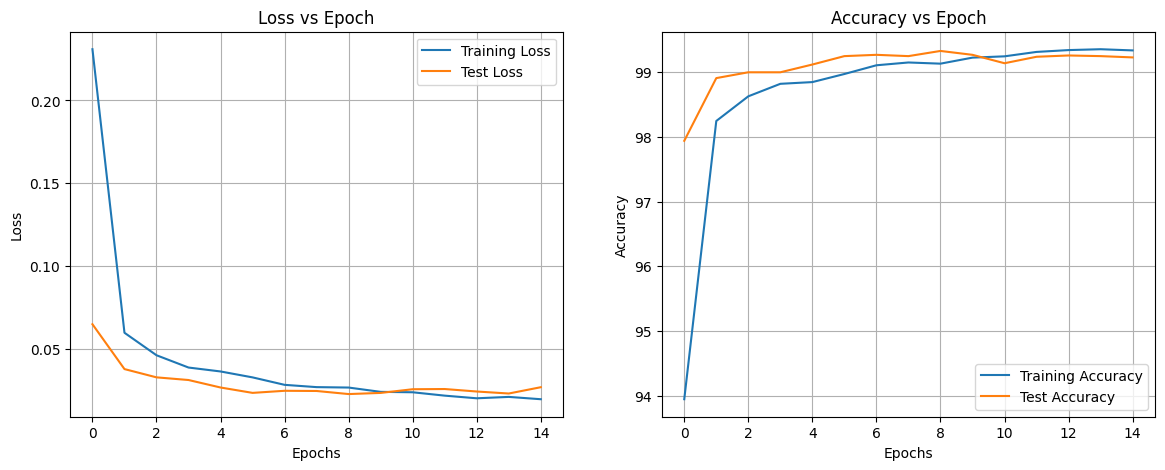

In [7]:
num_epochs = 15
model = Model_2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)  # large learning rate

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

trainer.plot_history()

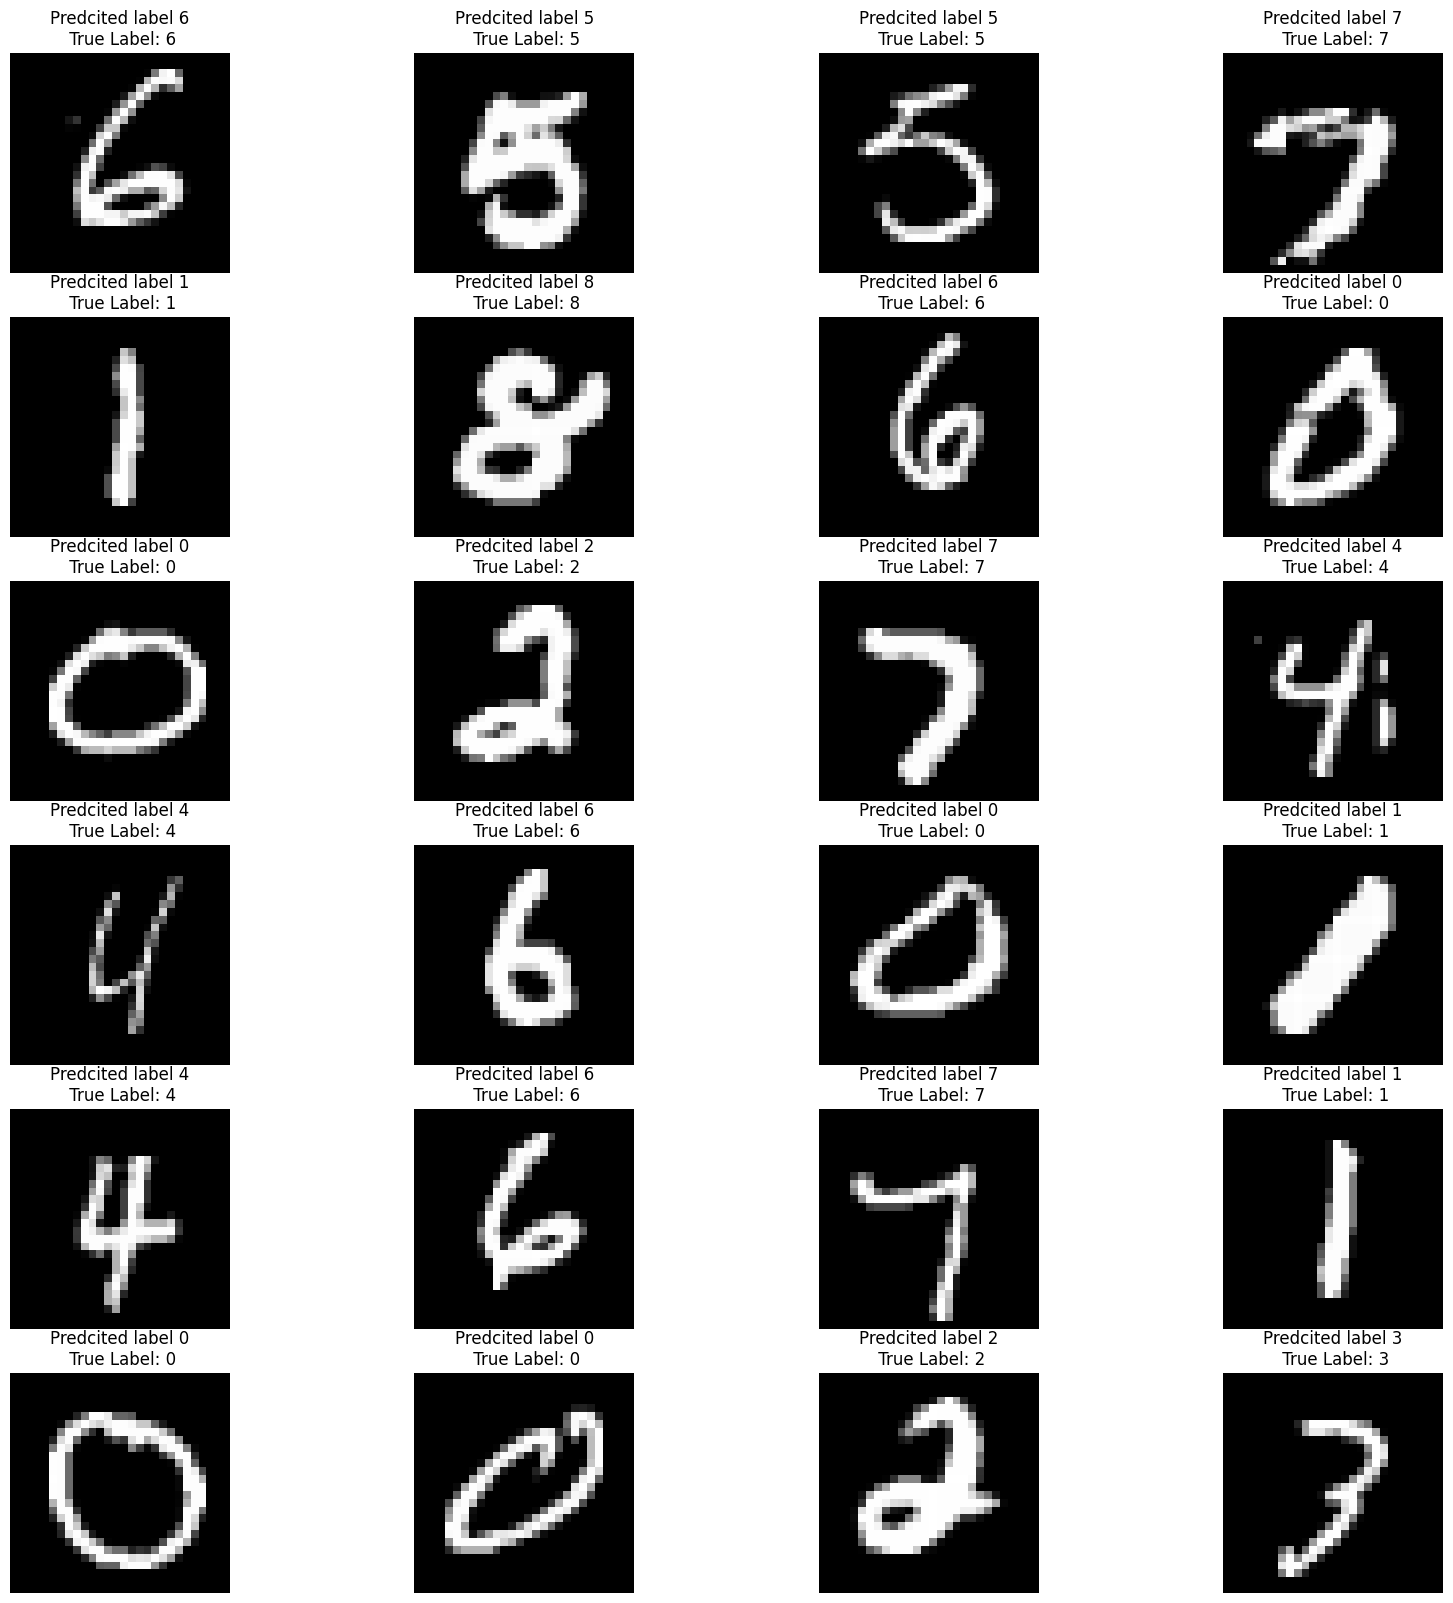

In [8]:
evaluate_model(trainer.model, test_loader, device)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
